# Surface measurements

In this notebook we demonstrate how to retrieve surface/vertex measurements in a table and how to visualize them on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces notebook](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo
from napari_process_points_and_surfaces import add_curvature, Curvature, spherefitted_curvature
import napari_process_points_and_surfaces as nppas

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [3]:
surface = nppas.gastruloid()

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


## Surface visualization
The surface itself does not come with any quantification. It looks like this:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
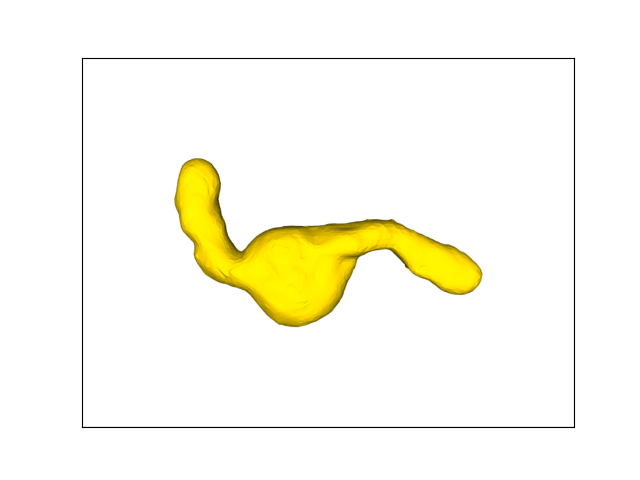

In [4]:
surface

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [5]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,
                         ]

df = nppas.surface_quality_table(surface, requested_measurements)
df

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL
0,0,29.997389,1.600400,0.030287,0.000490,0.000691,0.000257,0.000019
1,1,46.087046,1.602183,0.011136,0.000018,NaN,0.000250,0.000019
2,2,35.886338,1.400599,0.012633,0.000142,0.000542,0.000253,0.000019
3,3,22.887296,1.751932,0.036979,0.000548,0.000339,0.000379,0.000019
4,4,29.952347,1.220882,0.010277,0.000047,0.000366,0.000391,0.000019
...,...,...,...,...,...,...,...,...
3319,3319,25.079661,1.340802,0.031878,0.000606,0.001081,0.000168,0.000019
3320,3320,47.213916,1.254924,0.004615,0.000003,NaN,0.000169,0.000019
3321,3321,35.964707,1.140267,0.015661,0.000198,0.000547,0.000163,0.000019
3322,3322,45.673529,1.189562,0.011380,0.000100,0.000026,0.000152,0.000019


To get an overview about measurements, we can summarize them:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vertex_index,3324.0,1661.500000,9.597005e+02,0.000000e+00,830.750000,1661.500000,2492.250000,3323.000000
Quality.AREA,3324.0,33.753233,1.079078e+01,5.677486e+00,26.694735,32.956835,39.255080,125.564101
Quality.ASPECT_RATIO,3324.0,7.126810,8.990960e+01,1.038034e+00,1.292444,1.437911,1.648299,3421.965459
Quality.GAUSS_CURVATURE,3324.0,0.016958,3.527488e-02,-1.031106e+00,0.005509,0.013645,0.024739,0.348243
Quality.MEAN_CURVATURE,3324.0,0.000383,7.652709e-03,-2.803460e-02,-0.000135,0.000010,0.000270,0.426018
Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,2750.0,0.002875,4.759991e-03,1.789806e-09,0.000342,0.001003,0.003054,0.043504
Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,3324.0,0.000258,6.857515e-05,1.516445e-04,0.000214,0.000241,0.000275,0.000545
Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,3324.0,0.000019,3.388642e-21,1.853513e-05,0.000019,0.000019,0.000019,0.000019


We can extract a single column for the table as list.

In [7]:
curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL'])
curvature[:5]

[0.0002572409483117654,
 0.00025042866718866794,
 0.0002531992227477513,
 0.00037887302875519685,
 0.00039058363169657424]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 [0.0002572409483117654,
  0.00025042866718866794,
  0.0002531992227477513,
  0.00037887302875519685,
  0.00039058363169657424,
  0.0003600190783964104,
  0.0003812024248736095,
  0.0004032214052519288,
  0.0002661565851518192,
  0.0002720534146162575,
  0.0002614593000182443,
  0.0002535430671034702,
  0.0002444765153185341,
  0.000257360827669421,
  0.00025511530875216005,
  0.00042729231737963306,
  0.00040987383076612847,
  0.0004150967696368238,
  0.0003926723959885801,
  0.0003564980315785759,
  0.0003623340825496488,
  0.00033555981114871653,
  0.00033173650865084286,
  0.0002921858941142099,
  0.0002892736949807465,
  0.0002721312389510652,
  0.0002739698612751383,
  0.00025648821536703267,
  0.0002612249776248378,
  0.0002478275507613372,
  0.00026498619789606747,
  0.00026065427051607403,
  0.0002524483195951812,
  0.00019891821191909436,
  0.00020176568265474089,
  0.00020818335784812488,
  0.0001850191151668224,
  0.0002076759196735631,
  0.0001690413263473044,
  0.00016712950748005062,
  0.0001684276906393751,
  0.00017519826069848274,
  0.00017313698174847573,
  0.00016952165218300845,
  0.00017064989767587353,
  0.00018770826806459447,
  0.0001852143259732519,
  0.0001923523927073288,
  0.00019944376481798653,
  0.00019322147485570867,
  0.0004272880169744272,
  0.00036595567871689725,
  0.0003132085794564319,
  0.00034012046388165316,
  0.00030500059081084826,
  0.00031644591183555357,
  0.0003164924482079102,
  0.0002717489166254353,
  0.0002966246372772681,
  0.0002696932664949742,
  0.0002444676981293004,
  0.00026216161449327605,
  0.00026243819275078927,
  0.00025959623242481785,
  0.0002536757731849083,
  0.00021426161322416978,
  0.00021748430529425168,
  0.0002040980568482802,
  0.00021400355001653394,
  0.00019214256535299328,
  0.00020509264508201098,
  0.00018253943460016533,
  0.00017454588186636665,
  0.0001713500138058328,
  0.00017694103381585434,
  0.00017555980167772148,
  0.00017827197531162153,
  0.00017038514614467286,
  0.00016902581961629817,
  0.00017623218514931563,
  0.0001768753462650038,
  0.00017058922428553688,
  0.00017349616645110643,
  0.00017501709326249017,
  0.0001711842426333082,
  0.0001693081006526344,
  0.0001707192686465572,
  0.00017425499642092498,
  0.00017100157018340253,
  0.00017163491312213996,
  0.00017902069002878008,
  0.00019059227938701603,
  0.0001923885437297693,
  0.00018288453427589888,
  0.00018364720765073748,
  0.0001868497096903202,
  0.0001896479190321488,
  0.00020123964674876847,
  0.00019707817843142572,
  0.00020782125792412858,
  0.00021144493925669554,
  0.00020766153444654346,
  0.00043871884645211147,
  0.0004009767688542877,
  0.00040662381715911566,
  0.0004314457126305084,
  0.0003590238656272754,
  0.0003306031915479628,
  0.0003245627731504485,
  0.0003002202891710231,
  0.00029067551937629604,
  0.00032003665234913705,
  0.000262084120447589,
  0.0002616737912426526,
  0.00026765465224470907,
  0.0002642306988428909,
  0.0002521125145869295,
  0.0002562409438027258,
  0.00026524212313002913,
  0.00025775642493665383,
  0.0002527826022894682,
  0.0002511083640454574,
  0.00025872755582161615,
  0.0002525425677182156,
  0.0002202958097073085,
  0.00022296004718168385,
  0.00022531950092256778,
  0.0001959227614219583,
  0.00018939125953744125,
  0.00019768087544193047,
  0.00019178026167455538,
  0.00018047806258040714,
  0.00019168217876493543,
  0.0001854649539868315,
  0.00017275093398090628,
  0.0001739426121088212,
  0.0001721593673798292,
  
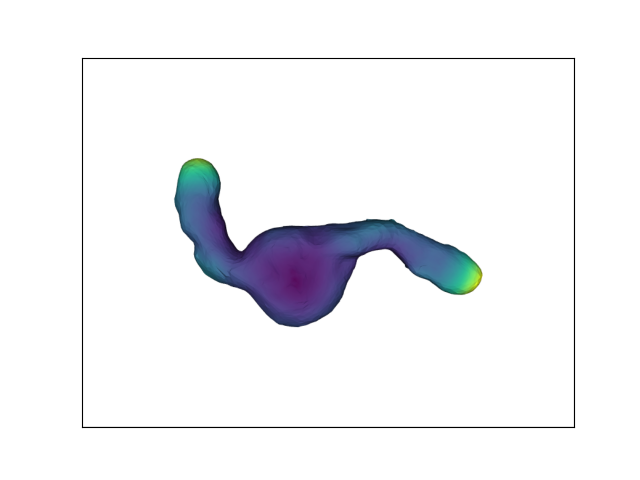
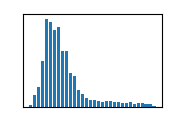

In [8]:
quantified_surface = nppas.set_vertex_values(surface, curvature)
quantified_surface

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

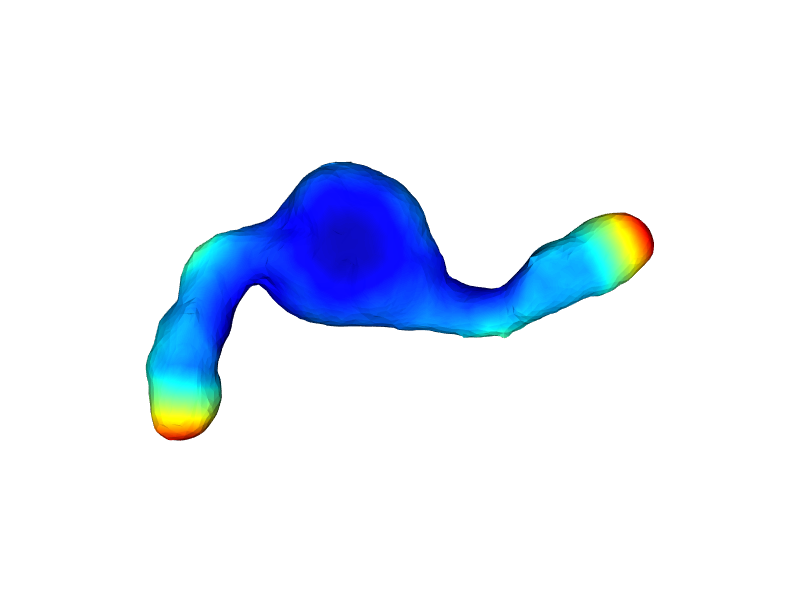

In [9]:
nppas.show(quantified_surface, azimuth=-90, cmap='jet')

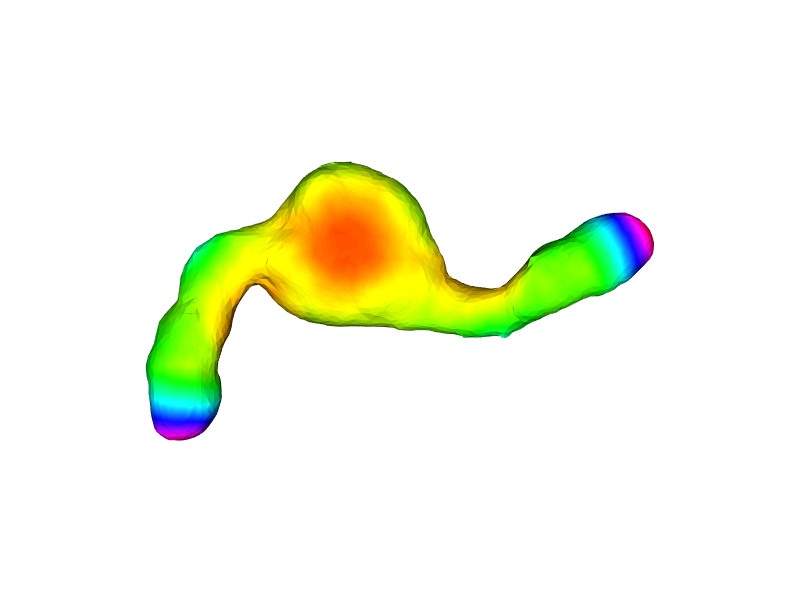

In [10]:
nppas.show(quantified_surface, azimuth=-90, cmap='hsv')